In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df=pd.read_csv("titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [9]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [10]:
X_train["Age_99"]=X_train["Age"].fillna(99)
X_train["Age_minus1"]=X_train["Age"].fillna(-1)

In [11]:
X_train.sample(4)

,Age,Fare,Family,Age_99,Age_minus1
85,33.0,15.8500,3,33.0,33.0
881,33.0,7.8958,0,33.0,33.0
879,56.0,83.1583,1,56.0,56.0
821,27.0,8.6625,0,27.0,27.0


In [12]:
X_train["Fare_999"]=X_train["Fare"].fillna(999)
X_train["Fare_minus1"]=X_train["Fare"].fillna(-1)

In [15]:
X_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
558,39.0,79.6500,2,39.0,39.0,79.6500,79.6500
347,NaN,16.1000,1,99.0,-1.0,16.1000,16.1000
738,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
274,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500
279,35.0,20.2500,2,35.0,35.0,20.2500,20.2500


In [16]:
X_train.describe()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
count,564.000000,676.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.785904,32.617597,0.932584,44.173104,23.386587,81.479629,30.917831
std,14.295087,49.479268,1.653860,30.850082,17.835067,217.299799,48.770562
min,0.420000,0.000000,0.000000,0.420000,-1.000000,0.000000,-1.000000
25%,21.000000,7.895800,0.000000,23.000000,4.750000,7.925000,7.893725
50%,28.750000,14.458300,0.000000,33.000000,24.000000,15.500000,13.000000
75%,38.250000,31.275000,1.000000,56.000000,35.000000,39.000000,30.500000
max,71.000000,512.329200,10.000000,99.000000,71.000000,999.000000,512.329200


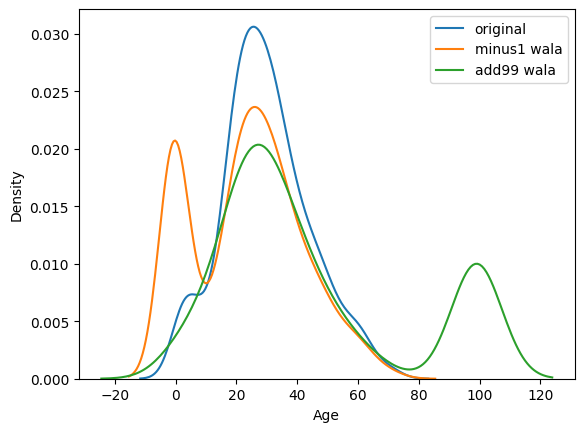

In [17]:
import seaborn as sns
sns.kdeplot(X_train,x="Age",label="original")
sns.kdeplot(X_train,x="Age_minus1",label="minus1 wala")
sns.kdeplot(X_train,x="Age_99",label="add99 wala")
plt.legend()

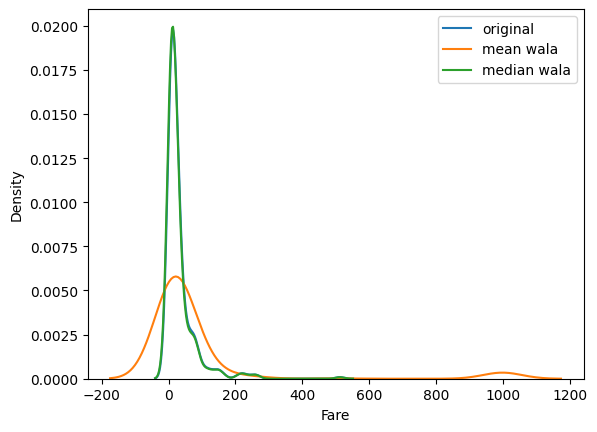

In [19]:
import seaborn as sns
sns.kdeplot(X_train,x="Fare",label="original")
sns.kdeplot(X_train,x="Fare_999",label="mean wala")
sns.kdeplot(X_train,x="Fare_minus1",label="median wala")
plt.legend()